In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

population_size = 10_000

mean_bmi = 30
std_bmi = 7

mean_loss_6m = 7.5 / 100  # 7.5%
std_loss_6m = 3 / 100  # ±3%
mean_loss_12m = 17.5 / 100  # 17.5%
std_loss_12m = 5 / 100  # ±5%

In [3]:
bmi_population_truncated = np.random.normal(mean_bmi, std_bmi, population_size)
bmi_population_truncated = bmi_population_truncated[bmi_population_truncated > 25]

In [4]:
population_size_truncated = len(bmi_population_truncated)
population_size_truncated

7609

In [5]:
loss_6m_truncated = np.random.normal(mean_loss_6m, std_loss_6m, population_size_truncated)
loss_12m_truncated = np.random.normal(mean_loss_12m, std_loss_12m, population_size_truncated)

In [6]:
bmi_after_6m_truncated = bmi_population_truncated * (1 - loss_6m_truncated)
bmi_after_12m_truncated = bmi_population_truncated * (1 - loss_12m_truncated)

In [7]:
df_truncated = pd.DataFrame({
    'Initial BMI': bmi_population_truncated,
    'BMI after 6 months': bmi_after_6m_truncated,
    'BMI after 12 months': bmi_after_12m_truncated
})

In [8]:
summary_stats_truncated = df_truncated.describe()
summary_stats_truncated

,Initial BMI,BMI after 6 months,BMI after 12 months
count,7609.000000,7609.000000,7609.000000
mean,32.847494,30.372417,27.120660
std,5.184201,4.904382,4.615871
min,25.001544,21.175161,17.639147
25%,28.712117,26.522395,23.588532
50%,32.113114,29.700542,26.450815
75%,36.109720,33.413077,30.035768
max,57.483664,53.760628,53.398069


In [9]:
initial_above_30_truncated = (df_truncated['Initial BMI'] > 30).mean() * 100
initial_above_25_truncated = (df_truncated['Initial BMI'] > 25).mean() * 100
after_6m_above_30_truncated = (df_truncated['BMI after 6 months'] > 30).mean() * 100
after_6m_above_25_truncated = (df_truncated['BMI after 6 months'] > 25).mean() * 100
after_12m_above_30_truncated = (df_truncated['BMI after 12 months'] > 30).mean() * 100
after_12m_above_25_truncated = (df_truncated['BMI after 12 months'] > 25).mean() * 100


In [10]:
results_truncated = {
    'Percentage > 30 (Initial)': initial_above_30_truncated,
    'Percentage > 25 (Initial)': initial_above_25_truncated,
    'Percentage > 30 (After 6 months)': after_6m_above_30_truncated,
    'Percentage > 25 (After 6 months)': after_6m_above_25_truncated,
    'Percentage > 30 (After 12 months)': after_12m_above_30_truncated,
    'Percentage > 25 (After 12 months)': after_12m_above_25_truncated
}

results_truncated

{'Percentage > 30 (Initial)': 65.606518596399,
 'Percentage > 25 (Initial)': 100.0,
 'Percentage > 30 (After 6 months)': 47.73294782494414,
 'Percentage > 25 (After 6 months)': 86.45025627546326,
 'Percentage > 30 (After 12 months)': 25.128137731633593,
 'Percentage > 25 (After 12 months)': 62.88605598633198}

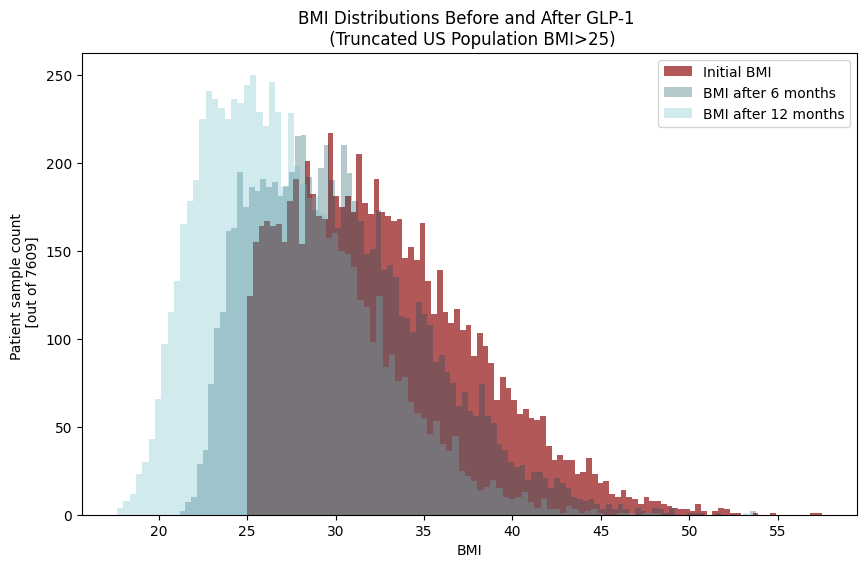

In [11]:
# Visualizing the truncated BMI distributions
plt.figure(figsize=(10, 6))
plt.hist(df_truncated['Initial BMI'], bins=100, alpha=0.75, label='Initial BMI', color='#992020')
plt.hist(df_truncated['BMI after 6 months'], bins=100, alpha=0.3, label='BMI after 6 months', color='#094d58')
plt.hist(df_truncated['BMI after 12 months'], bins=100, alpha=0.3, label='BMI after 12 months', color='#69bac8')

plt.title('BMI Distributions Before and After GLP-1 \n (Truncated US Population BMI>25)')
plt.xlabel('BMI')
plt.ylabel('Patient sample count \n [out of 7609]')
plt.legend()
plt.grid(False)
plt.show()


In [12]:
# Rank the initial BMIs and assign weight loss reductions proportional to rank

ranked_indices = np.argsort(df_truncated['Initial BMI'])[::-1]
ranked_indices

7608    2249
7607     157
7606    5238
7605    6261
7604    2864
        ... 
4       2443
3       2519
2        502
1       3896
0       5848
Name: Initial BMI, Length: 7609, dtype: int64

In [13]:
# Generate weight loss reductions proportional to rank
# We'll assign the weight loss from 7.5% to 7.5% + 3% (for 6 months) and 17.5% to 17.5% + 5% (for 12 months)
# The highest BMI will get the maximum possible reduction, and the lowest will get the minimum

# Scale the weight loss based on ranking
loss_6m_adjusted = np.linspace(mean_loss_6m - std_loss_6m, mean_loss_6m + std_loss_6m, population_size_truncated)
loss_12m_adjusted = np.linspace(mean_loss_12m - std_loss_12m, mean_loss_12m + std_loss_12m, population_size_truncated)



In [21]:
loss_12m_adjusted

array([0.125     , 0.12501314, 0.12502629, ..., 0.22497371, 0.22498686,
       0.225     ])

In [16]:
# Apply the loss adjustments to the BMI population, based on the ranked indices
adjusted_loss_6m = loss_6m_adjusted[ranked_indices]
adjusted_loss_12m = loss_12m_adjusted[ranked_indices]
adjusted_loss_6m
adjusted_loss_12m

array([0.15456099, 0.12706362, 0.19384858, ..., 0.13159832, 0.17620925,
       0.20186646])

In [25]:
bmi_population_truncated.sort()
bmi_population_truncated

array([25.00154417, 25.00490731, 25.01007952, ..., 54.70338631,
       56.96912043, 57.48366395])

In [26]:
# Apply the adjusted reductions to the BMI population
bmi_after_6m_adjusted = bmi_population_truncated * (1 - adjusted_loss_6m)
bmi_after_12m_adjusted = bmi_population_truncated * (1 - adjusted_loss_12m)
bmi_after_12m_adjusted


array([21.13728079, 21.82769334, 20.16191111, ..., 47.50451271,
       46.93063425, 45.87964041])

In [27]:
bmi_population_truncated

array([25.00154417, 25.00490731, 25.01007952, ..., 54.70338631,
       56.96912043, 57.48366395])

In [28]:
# Create a DataFrame with adjusted reductions
df_adjusted = pd.DataFrame({
    'Initial BMI': bmi_population_truncated,
    'BMI after 6 months (Adjusted)': bmi_after_6m_adjusted,
    'BMI after 12 months (Adjusted)': bmi_after_12m_adjusted
})

# Summary statistics for adjusted data
summary_stats_adjusted = df_adjusted.describe()
summary_stats_adjusted

,Initial BMI,BMI after 6 months (Adjusted),BMI after 12 months (Adjusted)
count,7609.000000,7609.000000,7609.000000
mean,32.847494,30.384228,27.099676
std,5.184201,4.832807,4.388172
min,25.001544,22.549190,19.581007
25%,28.712117,26.583248,23.641944
50%,32.113114,29.684623,26.479186
75%,36.109720,33.433835,29.829094
max,57.483664,52.655102,47.504513


In [29]:
# Calculate percentage of individuals with BMI > 30 and > 25 before and after treatment with adjusted reductions
initial_above_30_adjusted = (df_adjusted['Initial BMI'] > 30).mean() * 100
initial_above_25_adjusted = (df_adjusted['Initial BMI'] > 25).mean() * 100
after_6m_above_30_adjusted = (df_adjusted['BMI after 6 months (Adjusted)'] > 30).mean() * 100
after_6m_above_25_adjusted = (df_adjusted['BMI after 6 months (Adjusted)'] > 25).mean() * 100
after_12m_above_30_adjusted = (df_adjusted['BMI after 12 months (Adjusted)'] > 30).mean() * 100
after_12m_above_25_adjusted = (df_adjusted['BMI after 12 months (Adjusted)'] > 25).mean() * 100

# Prepare the results for easy display
results_adjusted = {
    'Percentage > 30 (Initial)': initial_above_30_adjusted,
    'Percentage > 25 (Initial)': initial_above_25_adjusted,
    'Percentage > 30 (After 6 months)': after_6m_above_30_adjusted,
    'Percentage > 25 (After 6 months)': after_6m_above_25_adjusted,
    'Percentage > 30 (After 12 months)': after_12m_above_30_adjusted,
    'Percentage > 25 (After 12 months)': after_12m_above_25_adjusted
}

results_adjusted

{'Percentage > 30 (Initial)': 65.606518596399,
 'Percentage > 25 (Initial)': 100.0,
 'Percentage > 30 (After 6 months)': 47.81180181364174,
 'Percentage > 25 (After 6 months)': 87.06794585359444,
 'Percentage > 30 (After 12 months)': 23.945327901169666,
 'Percentage > 25 (After 12 months)': 63.33289525561835}